In [1]:
import sys
import pandas as pd
sys.path.insert(0, './Libs/Preprocessing/')
from sklearn import preprocessing
from stock_data_preprocessing import DataLoader, FeatureEnricher

In [2]:
def dataPostProcessing(obj):
    obj.dropColumns(["Close"])
    obj.renameColumns(["date", "open", "high", "low", "close", "volume"])
    dataCol = obj.getColumn("date")
    dataCol = pd.to_datetime(dataCol)
dataLoader = DataLoader("./Data/MSFT.csv", lambda obj: dataPostProcessing(obj))
dataTable = dataLoader.getDataTable()
print(dataTable)

            date        open        high         low       close      volume
0     1986-03-13    0.088542    0.101563    0.088542    0.071132  1031788800
1     1986-03-14    0.097222    0.102431    0.097222    0.073673   308160000
2     1986-03-17    0.100694    0.103299    0.100694    0.074943   133171200
3     1986-03-18    0.102431    0.103299    0.098958    0.073038    67766400
4     1986-03-19    0.099826    0.100694    0.097222    0.071768    47894400
...          ...         ...         ...         ...         ...         ...
8158  2018-07-24  108.570000  108.820000  107.260002  107.660004    26316600
8159  2018-07-25  107.959999  111.150002  107.599998  110.830002    30702100
8160  2018-07-26  110.739998  111.000000  109.500000  109.620003    31372100
8161  2018-07-27  110.180000  110.180000  106.139999  107.680000    37005300
8162  2018-07-30  107.190002  107.529999  104.760002  105.370003    34602700

[8163 rows x 6 columns]


In [3]:
dataLoader = dataLoader.enrichReturnData()
dataTable = dataLoader.getDataTable()
print(dataTable.columns)
dataLoader.printOutlier("return")

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'return',
       'close_to_open', 'close_to_high', 'close_to_low', 'y'],
      dtype='object')
Smallest return:
405     0.698840
410     0.813472
3567    0.844022
3553    0.855294
754     0.862905
Name: return, dtype: float64
Largest return:
3692    1.195652
5697    1.186046
407     1.179685
413     1.157572
5726    1.122647
Name: return, dtype: float64


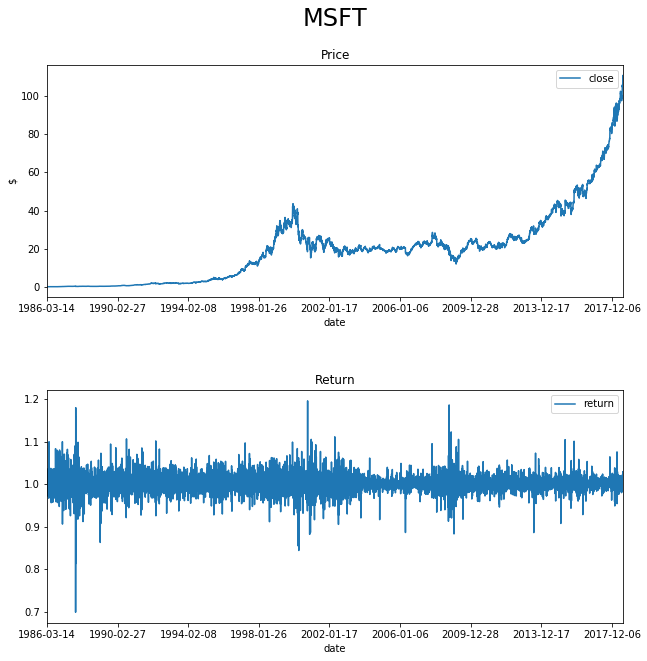

In [4]:
dataLoader.plotPriceVsReturn()

In [5]:
f_enricher = FeatureEnricher(dataTable).addTrendFeatures().\
    addMomentumFeatures().addVolatilityFeatures().addVolumeFeatures().generateFinalData()

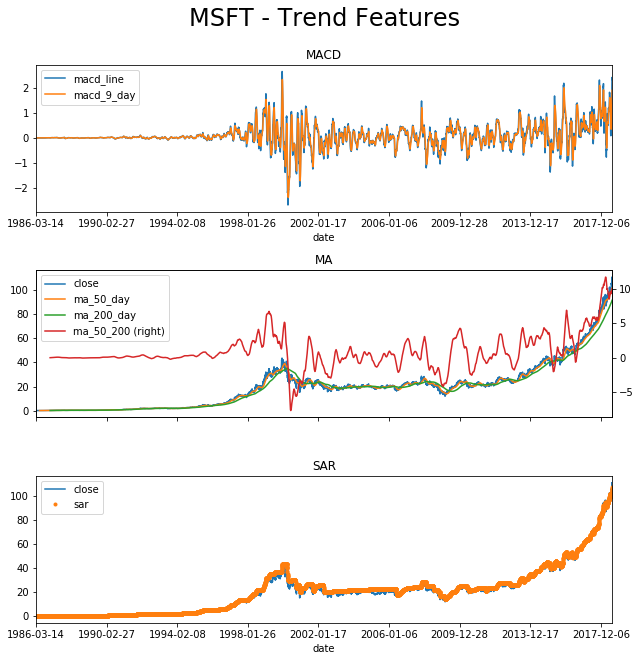

In [6]:
f_enricher.plotTrendFeatures()

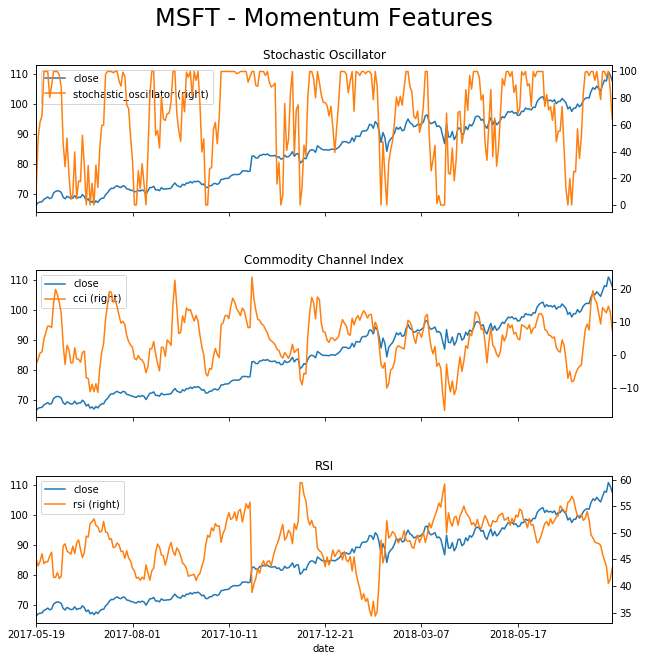

In [7]:
f_enricher.plotMomentumFeatures()

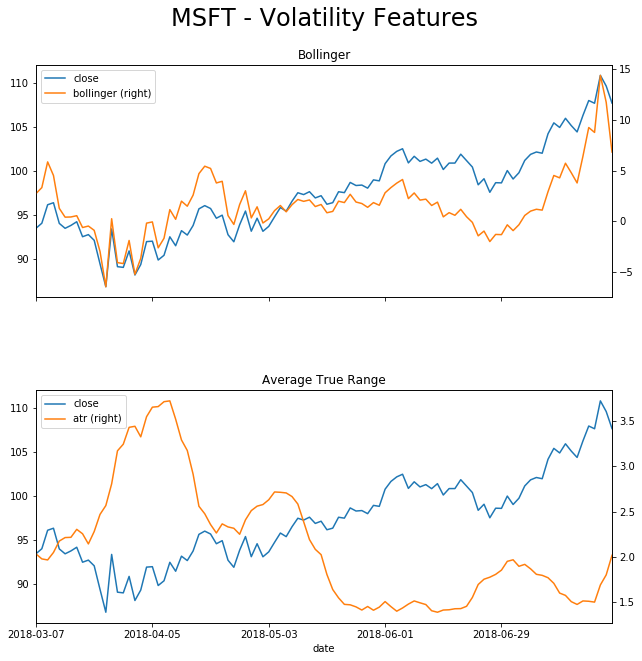

In [8]:
f_enricher.plotVolatilityFeatures()

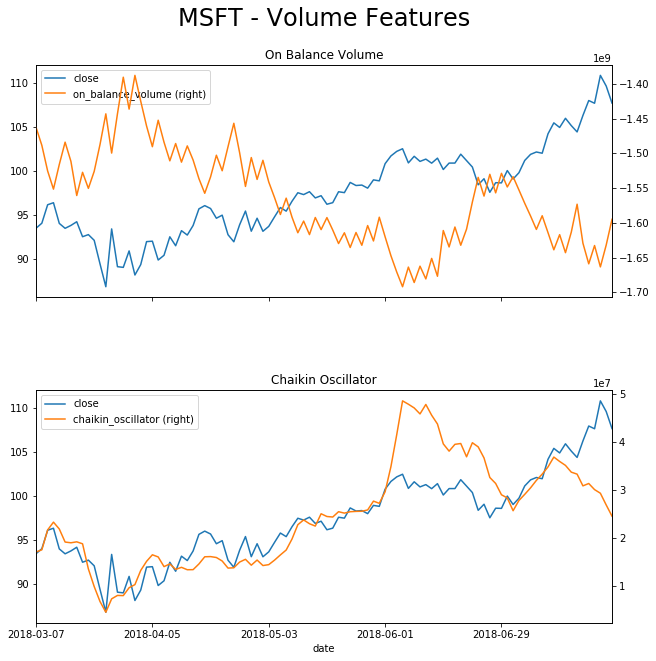

In [9]:
f_enricher.plotVolumeFeatures()

In [10]:
X, y = f_enricher.getXy()

In [11]:
print(X)

        return  close_to_open  close_to_high  close_to_low  macd_diff  \
200   0.997473       0.729796       0.724296      0.731648  -0.000493   
201   0.959390       0.701936       0.694882      0.731646  -0.000778   
202   1.010580       0.739387       0.727835      0.747299  -0.000866   
203   1.010469       0.739305       0.720446      0.739305  -0.000825   
204   0.989639       0.724064       0.716638      0.735495  -0.000865   
...        ...            ...            ...           ...        ...   
8156  1.017912       0.983253       0.982163      1.001791   0.407494   
8157  1.015997       1.015710       0.998428      1.017337   0.492449   
8158  0.997129       0.991618       0.989340      1.003729   0.487790   
8159  1.029445       1.026584       0.997121      1.030019   0.648181   
8160  0.989082       0.989886       0.987568      1.001096   0.622615   

      ma_50_200         sar  stochastic_oscillator        cci        rsi  \
200    0.027008    0.129444              92.858

In [12]:
print(y)

             y
200   0.959390
201   1.010580
202   1.010469
203   0.989639
204   1.057590
...        ...
8156  1.015997
8157  0.997129
8158  1.029445
8159  0.989082
8160  0.982302

[7961 rows x 1 columns]


In [16]:
train_test_split = 7000
X_learn = X[:train_test_split]
y_learn = y[:train_test_split]
X_test = X[train_test_split:]
y_test = y[train_test_split:]

scaler_model = preprocessing.StandardScaler().fit(X_learn)
X_learn_scaled = scaler_model.transform(X_learn)
X_test_scaled = scaler_model.transform(X_test)

pd.DataFrame(X_learn_scaled).to_csv("./Data/PreprocessingOutput/Xlearn.csv", index = False)
pd.DataFrame(y_learn).to_csv("./Data/PreprocessingOutput/ylearn.csv", index = False)
pd.DataFrame(X_test_scaled).to_csv("./Data/PreprocessingOutput/Xtest.csv", index = False)
pd.DataFrame(y_test).to_csv("./Data/PreprocessingOutput/ytest.csv", index = False)